Import required libaries

In [173]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

Then we insert all the required connection properties

In [174]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-EIK7IN6\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Generation UK&I\AppData\Local\Temp\ipykernel_6552\4044872253.py:2: SyntaxWarning: invalid escape sequence '\S'
  'Server=DESKTOP-EIK7IN6\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS


Now we create the cursor

In [175]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [176]:
query = 'SELECT E.OrganizationLevel, E.JobTitle, E.VacationHours, S.Bonus FROM HumanResources.Employee E INNER JOIN Sales.SalesPerson S ON E.BusinessEntityID = S.BusinessEntityID'

Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [177]:
salesdata = pd.read_sql(query, conn)

C:\Users\Generation UK&I\AppData\Local\Temp\ipykernel_6552\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


Let's get a preview of what our data looks like:

In [178]:
print(salesdata.head())

   OrganizationLevel                      JobTitle  VacationHours   Bonus
0                  2  North American Sales Manager             14     0.0
1                  3          Sales Representative             38  4100.0
2                  3          Sales Representative             27  2000.0
3                  3          Sales Representative             24  2500.0
4                  3          Sales Representative             33   500.0


Lastly i create a scatter plot using two of the fields returned from the database

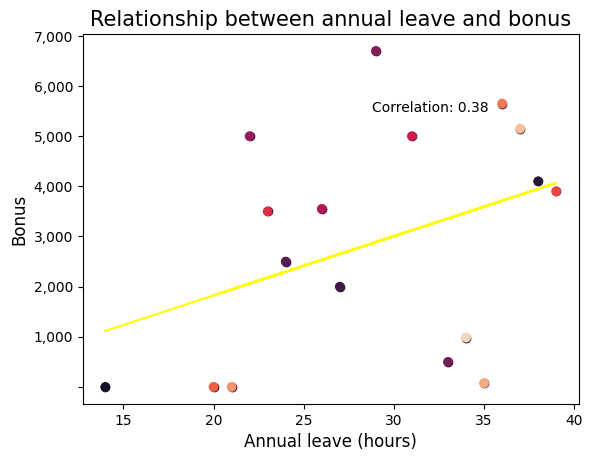

In [179]:
# Set the 'rocket' color palette
sns.set_palette("rocket")

# Create the scatter plot
plt.scatter(x='VacationHours', y='Bonus', data=salesdata)

# Customize y-axis ticks and labels (remove dollar sign)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000],
          ['', '1,000', '2,000', '3,000', '4,000', '5,000', '6,000', '7,000'])

# Add labels and title
plt.title('Relationship between annual leave and bonus', fontsize=15)
plt.xlabel('Annual leave (hours)', fontsize=12)
plt.ylabel('Bonus', fontsize=12)

# Add a line of best fit
m, b = np.polyfit(salesdata['VacationHours'], salesdata['Bonus'], 1)
plt.plot(salesdata['VacationHours'], m * salesdata['VacationHours'] + b, color='yellow')

# Calculate and format the linear correlation coefficient
from scipy.stats import pearsonr
correlation, _ = pearsonr(salesdata['VacationHours'], salesdata['Bonus'])
correlation_str = f"Correlation: {correlation:.2f}"  # Format to 2 decimal places

# Add text annotation for correlation coefficient
plt.text(0.7, 0.8, correlation_str, ha='center', va='center', transform=plt.gca().transAxes)  # Adjust position as needed

# Get the 'rocket' color palette as a list of RGB tuples
colors = sns.color_palette("rocket", len(salesdata))

# Assign colors to specific elements
plt.scatter(x='VacationHours', y='Bonus', data=salesdata, c=colors)

# Show Plot
plt.show()

Now you can reverse engineer the code I have shown you above to create your own projects